In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

1. ~~convert longs rows into short rows.~~
1. ~~remove empty rows~~
1. derive features
1. type date and numeric
1. missing values imputation.
1. filter by reliability

In [2]:
def get_df_bias_ratio(df):
    num_negative_R = len(df[df['Diagnosis_R'].str[0]=='3'])
    num_positive_R = len(df[df['Diagnosis_R'].str[0].isin(['1','2','4','5'])])
    ratio = num_negative_R/num_positive_R
    return ratio

In [3]:
def read_n_clean_data(filename):
    # read
    df = pd.read_csv(filename,skiprows=[0,1,3,4,5,6,7,8,9], index_col=0)
    # remove null columns
    df = df.drop(columns=['Unnamed: 1', 'Unnamed: 2'])
    # add patient ID
    df = df.reset_index()
    df.rename(columns = {'index':'Patient ID'},inplace=True)
    return df

In [4]:
basic_info = ['Patient ID','DOB', 'Gender', 'Race', 'Specify Race', 'Systemic Co-morbidities',
       'HTN', 'DM',]
right_info = ['Eye', 'Eye Hx_R ', 'Diagnosis_R', 'Eye Trauma_R ',
       'LASIK_R', 'Cataract_R', 'Other Relevant_R',
       'Specify Other Relevant', 'SurgeryR1', 'Date of surgery',
       'Age at surgery', 'Post-operative Cx', 'Specify Cx', 'SurgeryR2',
       'Date of surgery.1', 'Age at surgery.1', 'Post-operative Cx.1',
       'Specify Cx.1', 'SurgeryR3', 'Date of surgery.2',
       'Age at surgery.2', 'Post-operative Cx.2', 'Specify Cx.2',
       'IridotomyR1', 'Age at Iridotomy ', 'IridotomyR2',
       'Age at Iridotomy .1', 'IridoplastyR1', 'Age at Iridoplasty',
       'IridoplastyR2', 'Age at Iridoplasty ', 'CCT _R(um) ',
       'CCT Method ',]
left_info = ['Eye.1', 'Eye Hx_L ', 'Diagnosis_L',
       'Eye Trauma_L ', 'LASIK_L', 'Cataract_L', 'Other Relevant_L',
       'Specify Other Relevant.1', 'SurgeryL1', 'Date of surgery.3',
       'Age at surgery.3', 'Post-operative Cx.3', 'Specify Cx.3',
       'SurgeryL2', 'Date of surgery.4', 'Age at surgery.4',
       'Post-operative Cx.4', 'Specify Cx.4', 'SurgeryL3',
       'Date of surgery.5', 'Age at surgery.5', 'Post-operative Cx.5',
       'Specify Cx.5', 'IridotomyL1', 'Age at Iridotomy .2',
       'IridotomyL2', 'Age at Iridotomy .3', 'IridoplastyL1 ',
       'Age at Iridoplasty .1', 'IridoplastyL2', 'Age at Iridoplasty .2',
       'CCT _R(um) .1', 'CCT Method .1', ]
col_names = ['Patient ID','DOB', 'Gender', 'Race', 'Specify Race', 'Systemic Co-morbidities',
       'HTN', 'DM', 'Eye', 'Eye Hx', 'Diagnosis', 'Eye Trauma',
       'LASIK', 'Cataract', 'Other Relevant',
       'Specify Other Relevant', 
        'Surgery.1', 'Date of surgery.1', 'Age at surgery.1', 'Post-operative Cx.1', 'Specify Cx.1',
       'Surgery2', 'Date of surgery.2', 'Age at surgery.2','Post-operative Cx.2', 'Specify Cx.2', 
        'Surgery3','Date of surgery.3', 'Age at surgery.3', 'Post-operative Cx.3','Specify Cx.3', 
        'Iridotomy1', 'Age at Iridotomy.1',
       'Iridotomy2', 'Age at Iridotomy.2', 
        'Iridoplasty1 ','Age at Iridoplasty.1', 
        'Iridoplasty2', 'Age at Iridoplasty.2',
       'CCT _R(um)', 'CCT Method', 'Date', 'VFI', 'MD',
       'PSD', 'FL', 'FP', 'FN', 'GHT', 'Duration',
       'BCVA', 'CDR', 'IOP', 'Eyedrops','Right or Left']  # 0 for right, 1 for left
    
def split_into_separate_field(df):
    n = 74  # number of columns of shared information

    df_left_info = df[left_info]
    df_right_info = df[right_info]
    df_basic_info = df[basic_info]

    df_new = pd.DataFrame()
    l = df.columns.values

    #for i in range(1):
    for i in range(14):
        for j in range(2):
            visit_field_info = l[n++13*j+13*i:n+13*j+13*i+13]
            df_visit_field = df[visit_field_info]
            if j==0:
                df_sub = pd.concat([df_basic_info,df_right_info,df_visit_field],axis=1)
            else: 
                df_sub = pd.concat([df_basic_info,df_left_info,df_visit_field],axis=1)
            df_sub['Right or Left'] = j 
            df_sub.columns = col_names
            df_sub = df_sub[~df_sub['Date'].isna()]
            df_new = df_new.append(df_sub, ignore_index=True)

    df_new.columns = col_names
    return df_new

In [5]:
def drop_operation_related_fields(df):
    col_operation_related = ['Surgery.1', 'Date of surgery.1', 'Age at surgery.1', 'Post-operative Cx.1', 'Specify Cx.1',
           'Surgery2', 'Date of surgery.2', 'Age at surgery.2','Post-operative Cx.2', 'Specify Cx.2', 
            'Surgery3','Date of surgery.3', 'Age at surgery.3', 'Post-operative Cx.3','Specify Cx.3', 
            'Iridotomy1', 'Age at Iridotomy.1',
           'Iridotomy2', 'Age at Iridotomy.2', 
            'Iridoplasty1 ','Age at Iridoplasty.1', 
            'Iridoplasty2', 'Age at Iridoplasty.2',
           'CCT _R(um)', 'CCT Method',]
    col_operation_related += ['Eye','Duration']  # The Eye column indicate left or right eye. duplicate rows
    return df.drop(columns=col_operation_related)


In [6]:
def filter_reliable_field(df):
    # filter reliable ones
    for f in ['FL',]:
        df[f] = df[f].apply(lambda x: '0'+str(x) if str(x).startswith('/') else str(x))
        df[f] = df[f].apply(lambda x: '0' if str(x).endswith('/0') else str(x))
        df[f] = df.apply(lambda row: eval(row[f]),axis=1)

    df['FP'] = df['FP'].astype(float)
    df['FN'] = df['FN'].astype(float)

    return df[df.apply(lambda row: row['FL']<0.2 and row['FP']<34 and row['FN']<34 ,axis=1)]


In [7]:
def convert_to_datetime(df):
    df['DOB'] = pd.to_datetime(df['DOB'], format='%d/%m/%Y', errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='ignore')
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='ignore')
    return df

In [8]:
# calculate MD
from scipy import stats

def calculate_gradient(time_delta,y):
    # time_deltas = row['Date']-min(row['Date'])
    x = [x/np.timedelta64(365, 'D') for x in time_delta.values]
    if sum(x)==0:
        return 0
    # y = row['MD']
    return stats.linregress(x,y)[0]

def calculate_MD_gradient(df, threshold=-2):
    series_md_gradient = df.groupby('Patient ID').apply(lambda row: calculate_gradient(row['Date']-min(row['Date']),row['MD']))
    df_md_gradient = series_md_gradient.reset_index()
    df_md_gradient.columns=['Patient ID','MD gradient']
    
    df = pd.merge(df, df_md_gradient,how='left',on='Patient ID')
    
    df['MD Drop Fast'] = df['MD gradient']<threshold
    
    return df

In [9]:
def handle_missing_values(df):
    tmp = df.count()
    ind = tmp[tmp>len(df)/2.0].index
    df = df[ind]
    return df.fillna(df.median())

In [10]:
df = read_n_clean_data('Glaucoma - no identifiers.csv')

In [11]:
df = split_into_separate_field(df)

In [12]:
df = drop_operation_related_fields(df)

In [13]:
df = filter_reliable_field(df)

In [14]:
df = convert_to_datetime(df)

In [15]:
df = calculate_MD_gradient(df)

In [16]:
df = handle_missing_values(df)

In [17]:
df.to_csv('Glaucoma metadata V1.csv')

In [18]:
df['Age'] = (df['Date']-df['DOB'])/np.timedelta64(365, 'D')

In [19]:
numeric_features = ['Eye Hx','Diagnosis',]
for f in numeric_features:
    df[f] = df[f].apply(lambda x: int(str(x)[0]) if str(x)[0] in ['0','1','2','3','4','5'] else 0)

In [20]:
len(df['Patient ID'].unique())

60

In [21]:
df.corr()['MD Drop Fast']

Patient ID                 0.124594
Gender                    -0.186635
Race                      -0.080985
Systemic Co-morbidities    0.009153
HTN                       -0.117354
DM                         0.025253
Eye Hx                     0.163439
Diagnosis                 -0.093583
Eye Trauma                -0.075583
LASIK                     -0.026700
Cataract                  -0.015067
Other Relevant             0.060335
VFI                       -0.237763
MD                        -0.261319
FL                        -0.018146
FP                         0.040109
FN                         0.139514
GHT                        0.170223
Right or Left              0.007840
MD gradient               -0.772904
MD Drop Fast               1.000000
Age                        0.200554
Name: MD Drop Fast, dtype: float64

In [22]:
df.head()

,Patient ID,DOB,Gender,Race,Systemic Co-morbidities,HTN,DM,Eye Hx,Diagnosis,Eye Trauma,...,MD,PSD,FL,FP,FN,GHT,Right or Left,MD gradient,MD Drop Fast,Age
0,1,1989-05-09,1,1,0,0,0,1,4,1.0,...,-1.05,1.38,0.000000,0.0,0.0,0.0,0,0.331248,False,22.331507
1,2,1928-03-03,1,2,1,1,1,1,1,0.0,...,-3.32,2.29,0.066667,1.0,11.0,3.0,0,-2.657397,True,83.383562
2,4,1957-04-26,1,2,1,1,1,0,3,0.0,...,0.18,1.18,0.000000,0.0,0.0,0.0,0,-0.030765,False,54.643836
3,5,1973-11-13,1,2,1,1,0,1,3,0.0,...,-0.40,1.59,0.000000,0.0,0.0,2.0,0,0.162676,False,39.010959
4,8,1951-10-06,1,2,1,0,0,0,3,0.0,...,-0.06,1.21,0.142857,0.0,0.0,0.0,0,0.350477,False,59.619178


In [23]:
df.select_dtypes(exclude=['object','datetime'])

,Patient ID,Gender,Race,Systemic Co-morbidities,HTN,DM,Eye Hx,Diagnosis,Eye Trauma,LASIK,...,VFI,MD,FL,FP,FN,GHT,Right or Left,MD gradient,MD Drop Fast,Age
0,1,1,1,0,0,0,1,4,1.0,0.0,...,99.0,-1.05,0.000000,0.0,0.0,0.0,0,0.331248,False,22.331507
1,2,1,2,1,1,1,1,1,0.0,0.0,...,96.0,-3.32,0.066667,1.0,11.0,3.0,0,-2.657397,True,83.383562
2,4,1,2,1,1,1,0,3,0.0,0.0,...,100.0,0.18,0.000000,0.0,0.0,0.0,0,-0.030765,False,54.643836
3,5,1,2,1,1,0,1,3,0.0,0.0,...,98.0,-0.40,0.000000,0.0,0.0,2.0,0,0.162676,False,39.010959
4,8,1,2,1,0,0,0,3,0.0,0.0,...,100.0,-0.06,0.142857,0.0,0.0,0.0,0,0.350477,False,59.619178
5,12,1,2,1,1,1,1,1,0.0,0.0,...,60.0,-14.50,0.105263,19.0,0.0,3.0,0,0.085845,False,75.041096
6,16,2,2,1,1,1,0,3,0.0,0.0,...,90.0,-7.52,0.125000,1.0,7.0,1.0,0,0.351005,False,56.131507
7,17,1,3,1,0,1,0,3,0.0,0.0,...,100.0,-0.25,0.153846,9.0,0.0,0.0,0,0.228718,False,49.753425
8,18,1,3,1,1,1,0,3,0.0,0.0,...,90.0,-7.52,0.125000,1.0,7.0,1.0,0,0.198162,False,47.054795
9,19,2,3,1,1,1,0,1,0.0,0.0,...,100.0,-0.35,0.076923,5.0,3.0,0.0,0,-0.381184,False,65.232877


In [36]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
features = [f for f in df.columns if f not in ['Patient ID','DOB','MD Drop Fast','PSD','MD gradient']]
# features = df.columns
X_train = df[features]._get_numeric_data()
y_train = df['MD Drop Fast']

In [37]:
X_train.columns

Index(['Gender', 'Race', 'Systemic Co-morbidities', 'HTN', 'DM', 'Eye Hx',
       'Diagnosis', 'Eye Trauma', 'LASIK', 'Cataract', 'Other Relevant', 'VFI',
       'MD', 'FL', 'FP', 'FN', 'GHT', 'Right or Left', 'Age'],
      dtype='object')

In [38]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
len(X_train)

930

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=5)


array([0.89839572, 0.89839572, 0.90322581, 0.9027027 , 0.9027027 ])

In [41]:
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.         0.03090434 0.         0.         0.         0.08811534
 0.11553153 0.         0.         0.         0.         0.3884987
 0.06626771 0.05320411 0.         0.09467907 0.0049118  0.00562747
 0.15225993]


In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=43)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.95721925, 1.        , 0.94623656, 0.95675676, 0.89189189])

In [43]:
import graphviz 
from sklearn.tree import export_graphviz
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

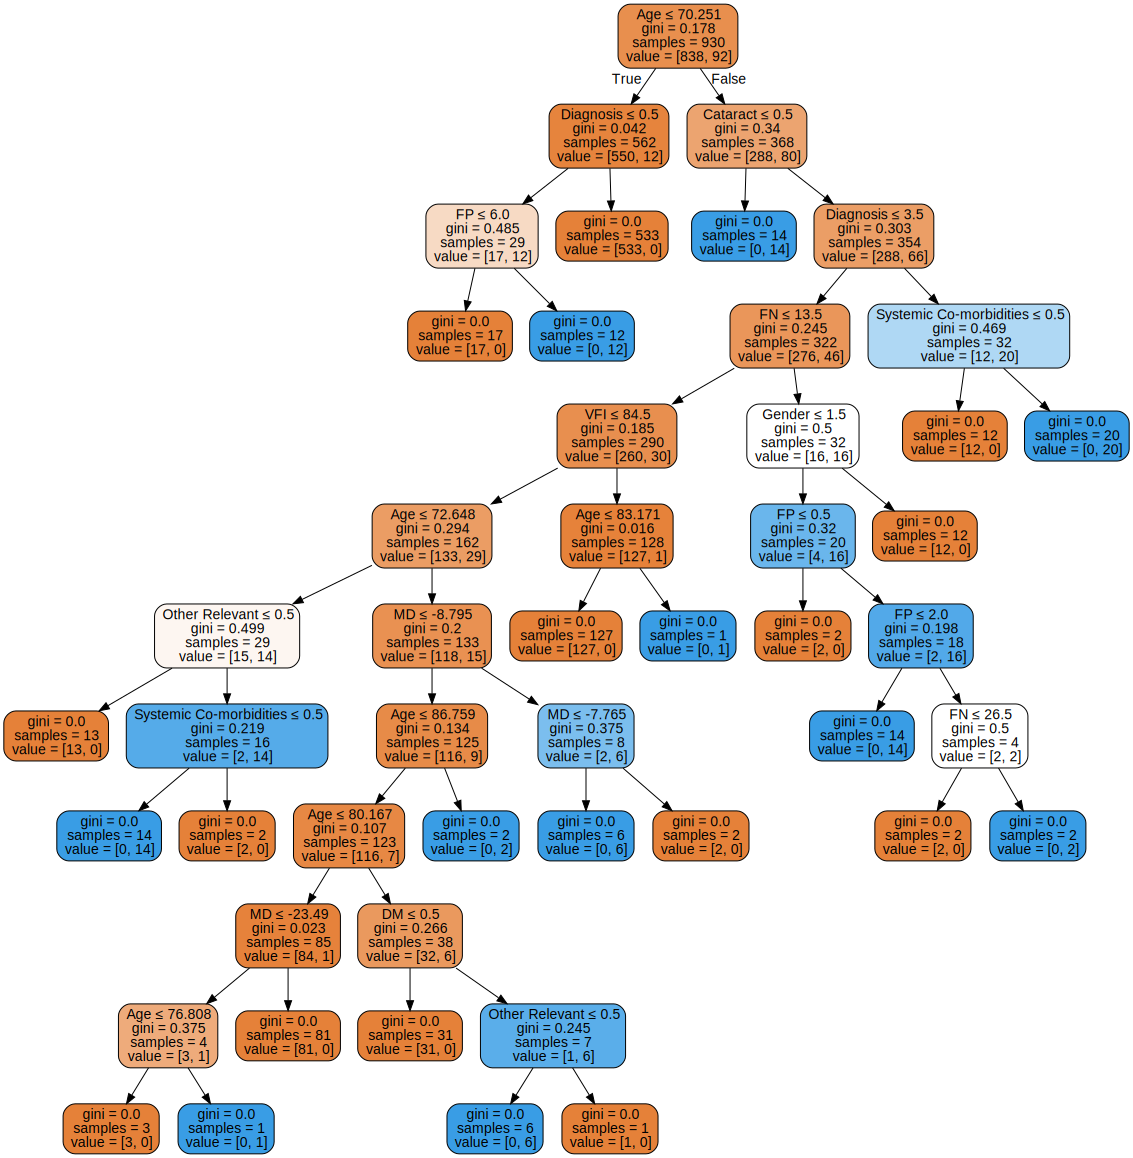

In [44]:
graph

In [45]:
clf.feature_importances_

array([0.05790184, 0.        , 0.11158166, 0.        , 0.05060969,
       0.        , 0.13842922, 0.        , 0.        , 0.10752589,
       0.07658148, 0.02528045, 0.06266072, 0.        , 0.11139448,
       0.0667321 , 0.        , 0.        , 0.19130247])